In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
import forward_selection as fs
from scipy.stats import chi2_contingency, pearsonr, spearmanr

In [73]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [100]:
dft11.ix[dft11["Ann?e"]==1981,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1981,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1988,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==2012,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2012,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1995,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1995,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2002,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2002,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2007,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2007,"pop_premier_ministre"].iloc[0]

In [101]:
def create_train(option_fn=False):
    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE',"d?partement", "taux_centre","taux_gauche", 'taux_xdroite'], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    
    
    if option_fn==True:
        dft12 = dft12[dft12["Ann?e"]!=1981]
        
    list_dell = ["Ann?e", "taux_Abstention"]
    
    df_train_x = dft12.drop(list_dell, axis=1)
    df_train_y = dft12['taux_Abstention']
    
    return df_train_x, df_train_y

In [102]:
def create_train_and_test(option_fn=False):

    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    
    dft11["Date"] = dft11["Ann?e"] - 1981
        
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_droite', 'taux_xgauche',\
                    'taux_vert', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE',"d?partement", "taux_centre","taux_gauche", 'taux_xdroite'], axis=1)
    
   
    


    
    list_dell = ["Ann?e", "taux_Abstention"]

    
    df_train = dft12[dft12["Ann?e"]!=2012]
    
    if option_fn==True:
        df_train = df_train[df_train["Ann?e"]!=1981]
        
    df_test = dft12[dft12["Ann?e"]==2012]
    
    df_train_x = df_train.drop(list_dell, axis=1)
    df_train_y = df_train['taux_Abstention']
    df_test_x = df_test.drop(list_dell, axis=1)
    df_test_y = df_test['taux_Abstention']
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [103]:
def generate_corr_features(target):
    
    df_train_x, df_train_y = create_train(True)

    mat_cor = pd.concat([df_train_x, df_train_y], axis=1)



    features_corr = pd.DataFrame(columns=["name","corr_pearson",
                                        "corr_pearson_pvalue","corr_spearman",
                                        "corr_sperman_pvalue"])
    for i in range(1, mat_cor.shape[1]):
        features_corr = features_corr.append(
            {"name" : mat_cor.columns[i],
            "corr_pearson": pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, target])[0],
            "corr_pearson_pvalue": round(pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, target])[1], 5),
            "corr_spearman": spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, target])[0],
            "corr_sperman_pvalue": round(spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, target])[1], 5),
           },
            ignore_index=True
            )
    features_corr2 = features_corr[(features_corr["corr_sperman_pvalue"]<=0.05) ]

    # plus besoin des pvalues puisque l'on à vérifié la condition de rejet sur h0
    del features_corr2["corr_sperman_pvalue"]
    del features_corr2["corr_pearson_pvalue"]

    features_var_select = features_corr2[(features_corr2["corr_spearman"]>=0.2)|
                                         (features_corr2["corr_spearman"]<=-0.2)]
    
    features_var_select.to_csv("file_corr/"+target +"_corr_sperman.csv", sep=";")

    features_select_corr = mat_cor.ix[:, features_var_select["name"]].corr()

    features_select_corr[abs(features_select_corr.ix[:,:])>=0.5].to_csv(
        "file_corr/"+target+"_features_corr_features.csv",sep=",")

In [111]:
def list_prediction(features_keep):

    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test()
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    df_test_x_select_features = df_test_x.ix[:, features_keep]

    p = len(features_keep)
    lr = LinearRegression(fit_intercept=True, normalize=True)
    lr.fit(df_train_x_select_features, df_train_y)
    print(df_test_x_select_features.columns)
    print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
    print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, p,lr))
    print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
    print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
    print("\n")
    print("Résultat avec fit entire data")
    df_train_x, df_train_y = create_train()
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    lr = LinearRegression(fit_intercept=True, normalize=True)
    lr.fit(df_train_x_select_features, df_train_y)
    print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
    print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, p,lr))
    print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))

In [112]:
def list_prediction_SM(features_keep):
    print("Résultat avec fit entire data")
    df_train_x, df_train_y = create_train()
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    df_train_x_select_features = sm.add_constant(df_train_x_select_features)
    model = sm.OLS(df_train_y , df_train_x_select_features)
    results = model.fit()
    print(results.summary())

In [98]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

table = dft11.ix[dft11['Ann?e']!=2012, :]

In [59]:
dft11.groupby(["d?partement"])["taux_Abstention"].mean()

d?partement
AIN                        25.363685
AISNE                      23.840368
ALLIER                     24.048183
ALPES-DE-HAUTE-PROVENCE    23.742568
ALPES-MARITIMES            29.991108
ARDECHE                    22.720789
ARDENNES                   26.728916
ARIEGE                     22.964952
AUBE                       25.170227
AUDE                       21.337590
AVEYRON                    20.139893
BAS-RHIN                   26.767383
BOUCHES-DU-RHONE           29.267152
CALVADOS                   23.695061
CANTAL                     23.566665
CHARENTE                   24.501643
CHARENTE-MARITIME          26.110313
CHER                       25.632257
CORREZE                    17.731697
CORSE-DU-SUD               48.658091
COTE-D'OR                  24.002033
COTES-D'ARMOR              19.625834
CREUSE                     26.714582
DEUX-SEVRES                21.854082
DORDOGNE                   20.257847
DOUBS                      22.644826
DROME                     

In [60]:
stat_abst = pd.DataFrame({'Mean' : table.groupby(["d?partement"])["taux_Abstention"].mean(),
             "Std" : table.groupby(["d?partement"])["taux_Abstention"].std()}).reset_index()

table_pop = dft11.ix[dft11["Ann?e"]==2012, ["d?partement", "Total"]]

df = pd.merge(stat_abst, table_pop, on="d?partement")
table_2012 = dft11.ix[dft11['Ann?e']==2012, ["d?partement", "taux_Abstention"]]
df = pd.merge(df, table_2012, on="d?partement")
df.columns = ["département", "Mean (nc 2012)","Std (nc 2012)", "Pop 2012", "Abstention 2012"]

In [66]:
df["use_w"] = 100 * df["Pop 2012"]/ df["Pop 2012"].sum() 
df["true_w"] = 100 * df["Pop 2012"]*(1- df["Abstention 2012"]) / (df["Pop 2012"]*(1- df["Abstention 2012"]).sum())
df["potentiel_w"] = 100 * df["Pop 2012"]*(1- df["Mean (nc 2012)"]) / (df["Pop 2012"]*(1- df["Mean (nc 2012)"]).sum())

In [71]:
print("En utilisant la pop comme moyen de pondération")
print("Ecart des poids en moyenne abs %s" % abs(df["use_w"]-df["true_w"]).mean())
print("Ecart des poids std %s" % (df["use_w"]-df["true_w"]).std())
print("\n")
print("En utilisant la moyenne de l'abstention passé")
print("Ecart des poids en moyenne abs %s" % abs(df["potentiel_w"]-df["true_w"]).mean())
print("Ecart des poids std %s" % (df["potentiel_w"]-df["true_w"]).std())

En utilisant la pop comme moyen de pondération
Ecart des poids en moyenne abs 0.5520500644199035
Ecart des poids std 0.7337872893458833


En utilisant la moyenne de l'abstention passé
Ecart des poids en moyenne abs 0.08502882779050182
Ecart des poids std 0.12404795171113916


In [105]:
generate_corr_features("taux_Abstention")

In [113]:
features_keep = [
"pop_xgauche",
"pop_president",
"subventions",
"75+ans"
]
list_prediction_SM(features_keep)

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:        taux_Abstention   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     124.4
Date:                Fri, 14 Apr 2017   Prob (F-statistic):           2.72e-76
Time:                        16:24:46   Log-Likelihood:                -1847.6
No. Observations:                 576   AIC:                             3705.
Df Residuals:                     571   BIC:                             3727.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           

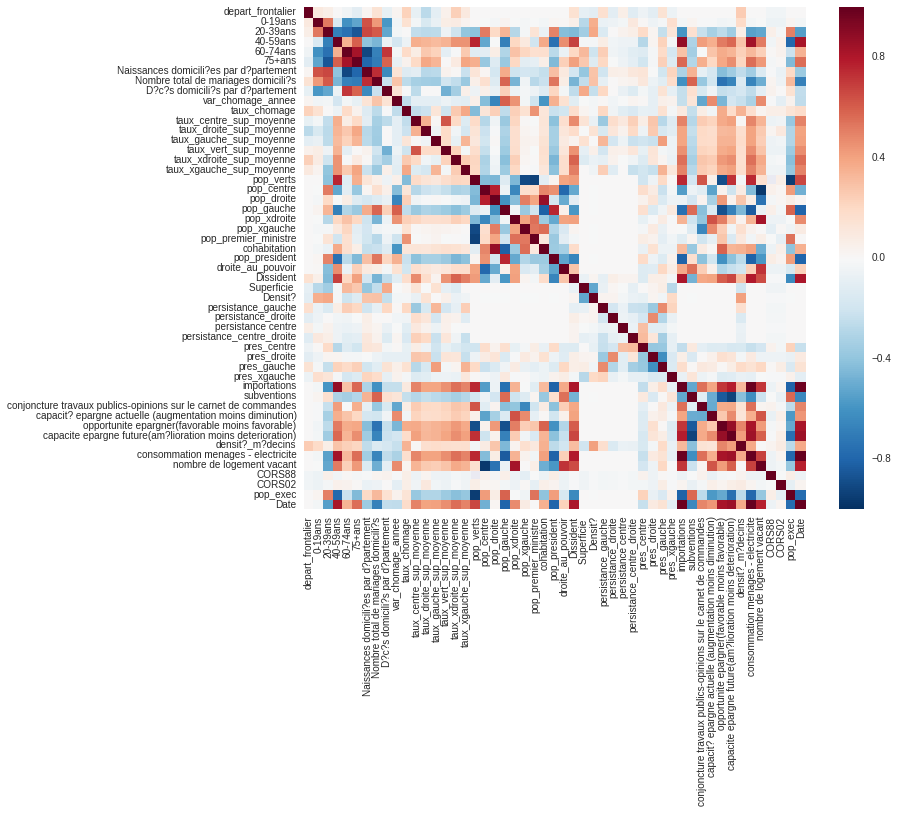

In [117]:
df_train_x, df_train_y = create_train()
heat_mat = df_train_x.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(heat_mat, vmax=1, square=True)
plt.show()